# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/sample_data/b1abb33c4f.csv', sep = ',')
df = pd.DataFrame(df)

In [75]:
df['APGAR1'].dtypes

dtype('float64')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [71]:
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

**Mostra o número de categorias únicas para cada uma das variáveis: 'APGAR1', 'APGAR5', 'SEXO', 'GESTACAO' e 'ESTCIVMAE'. Isso fornece informações sobre o número de valores distintos presentes em cada variável.**

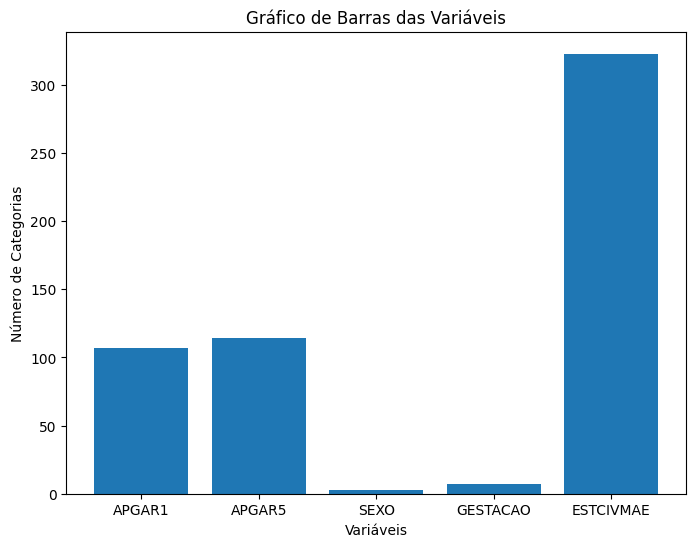

In [72]:
apgar1 = df['APGAR1']
apgar5 = df['APGAR5']
sexo = df['SEXO']
gestacao = df['GESTACAO']
estcivmae = df['ESTCIVMAE']

# Configuramos os eixos
y = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']
x = [apgar1, apgar5, sexo, gestacao, estcivmae]

# Criamos o gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(y, [len(set(v)) for v in x])

# Configuramos o gráfico
ax.set_xlabel('Variáveis')
ax.set_ylabel('Número de Categorias')
ax.set_title('Gráfico de Barras das Variáveis')

# Exibimos o gráfico
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

**Calcula a média de 'APGAR5' para diferentes níveis de 'CONSULTAS' e exibe o resultado em um gráfico de barras. Isso oferece uma visão geral da pontuação média de 'APGAR5' com base no número de consultas pré-natais.**

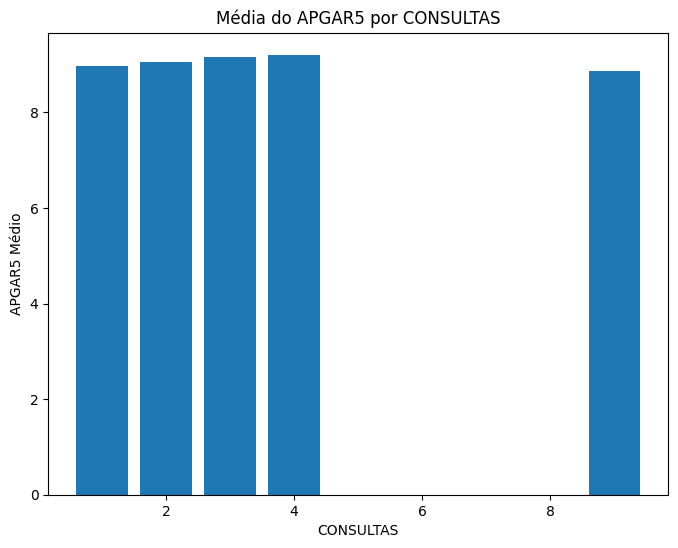

In [73]:
# Agrupamos os dados por CONSULTAS e calculamos a média do APGAR5
media_apgar5 = df.groupby('CONSULTAS')['APGAR5'].mean()

# Configuramos os eixos
x = media_apgar5.index
y = media_apgar5.values

# Criamos o gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x, y)

# Configuramos o gráfico
ax.set_xlabel('CONSULTAS')
ax.set_ylabel('APGAR5 Médio')
ax.set_title('Média do APGAR5 por CONSULTAS')

# Exibimos o gráfico
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

**Gera um painel com quatro gráficos que mostram a frequência de cada categoria em variáveis específicas. Os gráficos representam a quantidade de registros para cada valor possível nas variáveis 'SEXO', 'GESTACAO', 'ESTCIVMAE' e 'CONSULTAS'. Eles são úteis para visualizar a distribuição e frequência das categorias em cada variável.**

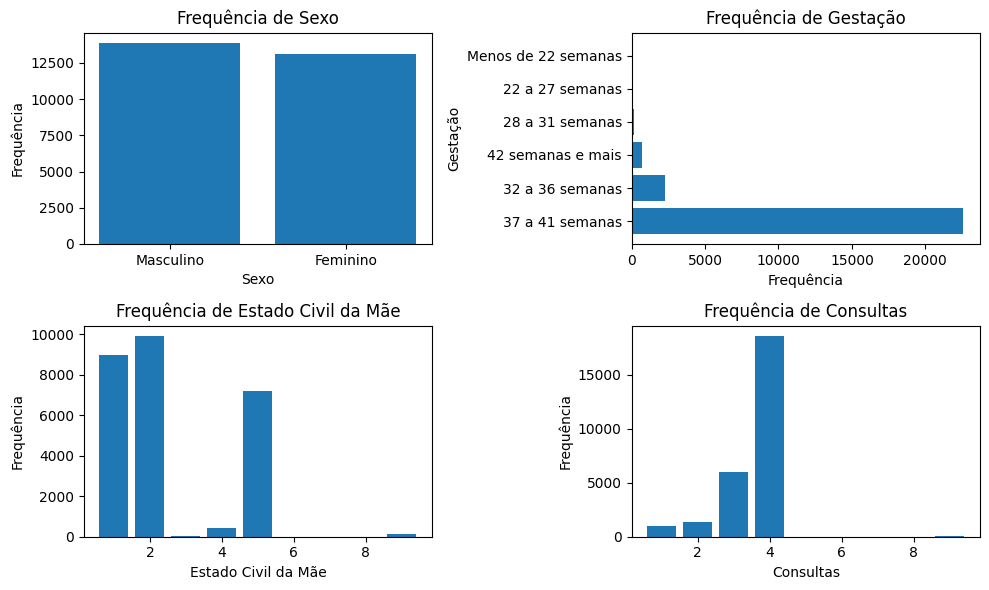

In [76]:
# Configuramos o painel
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Criamos o gráfico de frequências de SEXO
sexo_counts = df['SEXO'].value_counts()
axs[0, 0].bar(sexo_counts.index, sexo_counts.values)
axs[0, 0].set_xlabel('Sexo')
axs[0, 0].set_ylabel('Frequência')
axs[0, 0].set_title('Frequência de Sexo')

# Criamos o gráfico de frequências de GESTACAO
gestacao_counts = df['GESTACAO'].value_counts()
axs[0, 1].barh(gestacao_counts.index, gestacao_counts.values)
axs[0, 1].set_xlabel('Frequência')
axs[0, 1].set_ylabel('Gestação')
axs[0, 1].set_title('Frequência de Gestação')

# Criamos o gráfico de frequências de ESTCIVMAE
estcivmae_counts = df['ESTCIVMAE'].value_counts()
axs[1, 0].bar(estcivmae_counts.index, estcivmae_counts.values)
axs[1, 0].set_xlabel('Estado Civil da Mãe')
axs[1, 0].set_ylabel('Frequência')
axs[1, 0].set_title('Frequência de Estado Civil da Mãe')

# Criamos o gráfico de frequências de CONSULTAS
consultas_counts = df['CONSULTAS'].value_counts()
axs[1, 1].bar(consultas_counts.index, consultas_counts.values)
axs[1, 1].set_xlabel('Consultas')
axs[1, 1].set_ylabel('Frequência')
axs[1, 1].set_title('Frequência de Consultas')

# Ajustamos o espaçamento entre os subplots
plt.tight_layout()

# Exibimos o painel
plt.show()